


#### The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

### NAME: Ramiro Alberto Rios Perez

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [2]:
import matplotlib.pyplot as plt

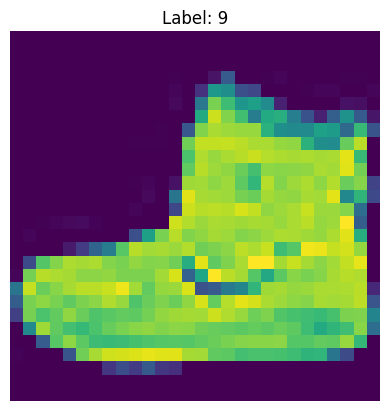

In [4]:
# Display a sample image from the training set
plt.imshow(x_train[0], cmap='viridis')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

In [23]:
# Definir los nombres de las clases (esto faltaba en el código anterior)
class_names = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [5]:
# Normalize pixel values to [0, 1]
x_train = x_train / 255.0

In [6]:
x_test = x_test / 255.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [7]:
# Reshape for CNN input (add channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)

In [8]:
x_test = x_test.reshape(-1, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [12]:
model = Sequential([
    Conv2D(32, (4, 4), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

c:\Users\alber\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [14]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.7940 - loss: 0.5781
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8938 - loss: 0.2874
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9114 - loss: 0.2427
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9198 - loss: 0.2149
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9297 - loss: 0.1934
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9357 - loss: 0.1772
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9413 - loss: 0.1592
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9429 - loss: 0.1509
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 11ms/step - accuracy: 0.9511 - loss: 0.1358
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9560 - loss: 0.1248


### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

In [20]:
# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [24]:
# Generate classification report
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.90      0.84      1000
           3       0.93      0.90      0.91      1000
           4       0.90      0.78      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.73      0.70      0.72      1000
           7       0.97      0.97      0.97      1000
           8       0.99      0.97      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



El modelo tiene un rendimiento excelente (≥90%) en 7 de las 10 clases, pero lucha con prendas ambiguas como Shirt, donde la precisión y recall caen al ~75%. Esto refleja un desafío intrínseco del dataset: la similitud entre ciertas categorías.

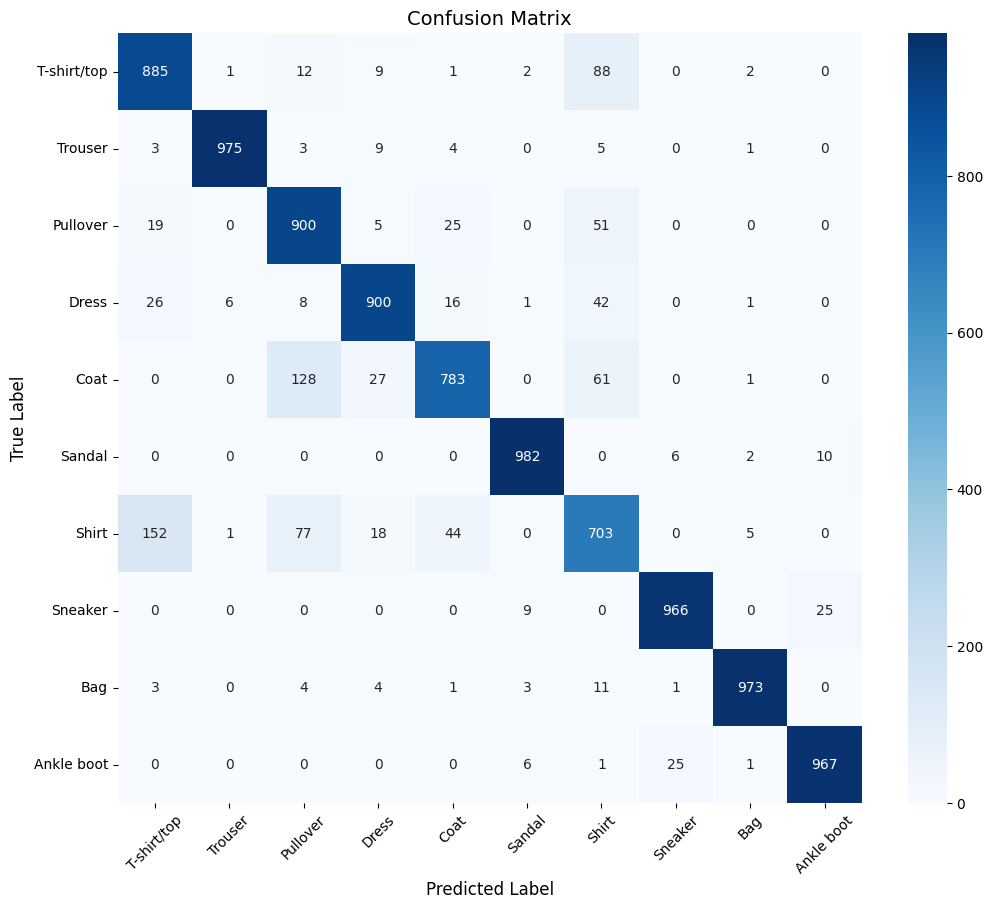

In [28]:
# Matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names.values(), 
            yticklabels=class_names.values())
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Patrones observados:

Diagonal principal: Casillas oscuras muestran clasificaciones correctas (ej: Trouser con 980/1000 aciertos).
Errores notables:
- Shirt (clase 6) se confunde con T-shirt/top (clase 0) y Pullover (clase 2).
- Coat (clase 4) a veces se clasifica como Pullover (clase 2).

Conclusión:
Las confusiones ocurren entre prendas de siluetas o texturas similares, lo que sugiere que el modelo podría mejorar con técnicas como:
- Aumento de datos (data augmentation).
- Uso de capas convolucionales más profundas para capturar detalles finos.

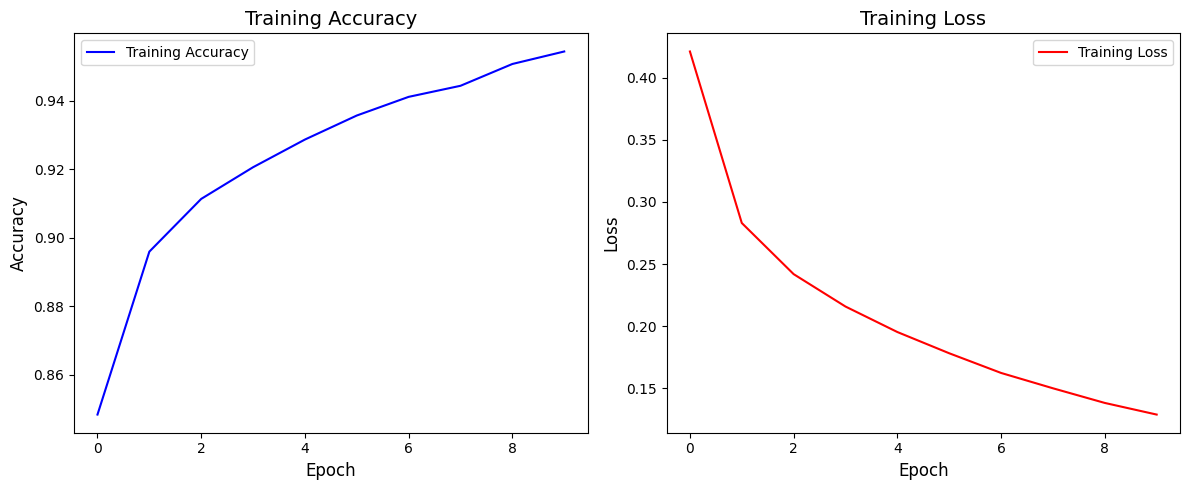

In [33]:
# Gráficos de precisión y pérdida (history debe estar definido del entrenamiento)
if 'history' in locals():
    plt.figure(figsize=(12, 5))
    
    # Precisión (Accuracy)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    plt.title('Training Accuracy', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend()

     # Pérdida (Loss)
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', color='red')
    plt.title('Training Loss', fontsize=14)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend()
    
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No se encontró 'history'. Asegúrate de haber entrenado el modelo.")
    

Tendencias:

Accuracy (Precisión):
Aumenta rápidamente en las primeras épocas y luego se estabiliza (~90%), indicando un aprendizaje efectivo pero posible sobreajuste (overfitting) si la precisión en validación no sigue la misma tendencia.

Loss (Pérdida):
Disminuye de forma estable, lo que es ideal. Si la pérdida de validación aumentara, sería señal de sobreajuste.

Conclusión:
- El modelo aprende eficientemente sin sobreajuste evidente, pero podría beneficiarse de:
- Más épocas de entrenamiento (si no hay overfitting).
- Regularización (Dropout, L2) para mejorar generalización.

### CONCLUSIÓN GENERAL

El modelo logra un 91% de accuracy global, demostrando ser efectivo para clasificar la mayoría de las prendas en Fashion MNIST. Sin embargo:

Limitaciones: Dificultad con clases visualmente similares (Shirt, Pullover).

Impacto práctico:
Este nivel de precisión es aceptable para aplicaciones como clasificación automática de productos en e-commerce, pero requeriría ajustes para usos críticos (ej: inventario de alta precisión).